# Diagnosis of Infectious Diseases using Machine Learning Models

### Problem Statement

Given a set of cell images of patients, appropriate Machine Learning Models are applied to diagnose if the patient has Malaria or not, and try to obtain the best possible results with the highest possible accuracy.

### Introduction 

Malaria is a disease caused by a parasite. The parasite is spread to humans through the bites of infected mosquitoes. The number of estimated annual death associated with Malaria in India alone are 19000. We are taking images of the cell of patients as raw data and predictions are done using supervised learnings, as the data which we have is labelled.

This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

Predictions are based on patients cell images with which suitable amount of accuracy is obtained. We aim to save humans by detecting and deploying Image Cells that contain Malaria or not! However, our model can also be used in case of detecting other infectious diseases that can be identified through cell images. We train our model to be able to distinguish between human cells that are infected with malaria, and cells that aren’t infected.

Considering that our data is not skewed, accuracy score is the best metric for model comparison.

### Methodology 

1. Importing Libraries.
2. Loading the data.
3. Data augmentation.
4. Ploting images and its labels to understand how an infected cell and uninfected cell looks.
5. Data preprocessing.
6. Spliting data in Train , Evaluation and Test set.
<br/><br/>
7. Create the __Support Vector Machine__ function and wrap it with Tensorflow Estimator function to train and evaluate data.
8. Predict test data and obtain the accuracy score.
<br/><br/>
9. Create the __K-Nearest Neighbour__ function and wrap it with Tensorflow Estimator function to train and evaluate data. 
10. Predict test data and obtain the accuracy score.
<br/><br/>
11. Create the __Artificial Neural Network__ function and wrap it with Tensorflow Estimator function to train and evaluate data. 
12. Predict test data and obtain the accuracy score.
<br/><br/>
13. Creating a __Convolution Neural Network__ function and wrap it with Tensorflow Estimator function to train and evaluate data.
14. Predict test data and obtain the accuracy score.
<br/><br/>
15. Compare the accuracies of the different models.
16. Conclude on which model is performing the best and try to __further optimise the model__ to obtain a higher accuracy score.

### <br/> Implementation

### Import libraries

In [1]:
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import cv2
from PIL import Image
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
print(os.listdir("cell_images/cell_images"))

['Parasitized', 'Uninfected']


### Load the Dataset

In [3]:
infected = os.listdir('cell_images/cell_images/Parasitized/') 
uninfected = os.listdir('cell_images/cell_images/Uninfected/')

### Data Augmentation

In [4]:
data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread("cell_images/cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread("cell_images/cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        labels.append(0)
        labels.append(0)
        labels.append(0)
        
    except AttributeError:
        print('')

In [5]:
cells = np.array(data)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

In [6]:
print('Cells : {} | labels : {}'.format(cells.shape , labels.shape))

Cells : (96453, 50, 50, 3) | labels : (96453,)


### Plot the dataset 

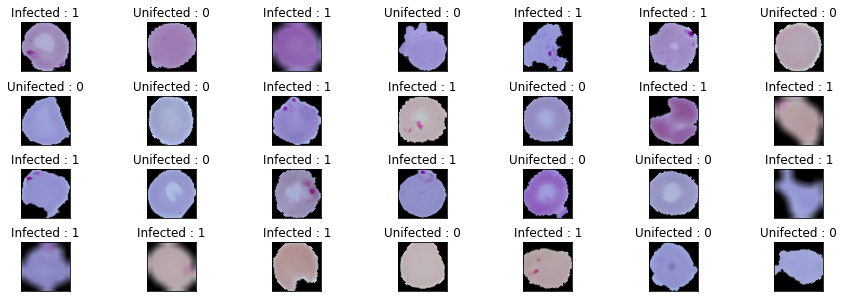

In [7]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(28):
    n += 1 
    r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'Unifected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

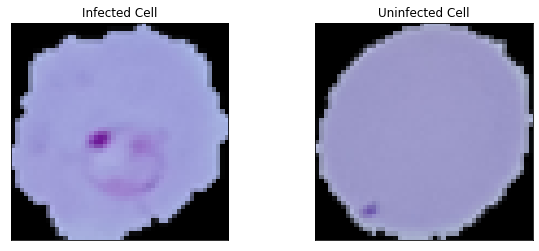

In [8]:
plt.figure(1, figsize = (10 , 4))
plt.subplot(1 , 2 , 1)
plt.imshow(cells[0])
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cells[60000])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

### Data Preprocessing

In [9]:
s = np.arange(cells.shape[0])
np.random.shuffle(s)
cells = cells[s]
labels = labels[s]
num_classes = len(np.unique(labels))

In [10]:
cells = cells.astype('float32') / 255

### Split the data into Train and Test

In [11]:
(train_x, test_x, train_y, test_y) = train_test_split(cells, labels,
                                                      test_size=0.2, stratify=labels)

In [12]:
train_y = to_categorical(train_y, num_classes)
test_y = to_categorical(test_y, num_classes)

### Support Vector Machines

In [13]:
model_svm = Sequential()
model_svm.add(Conv2D(16,(5,5),padding='valid',activation="relu",input_shape = (50, 50, 3)))
model_svm.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
model_svm.add(Dropout(0.4))
model_svm.add(Conv2D(32,(5,5),padding='valid',activation="relu"))
model_svm.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
model_svm.add(Dropout(0.6))
model_svm.add(Conv2D(64,(5,5),padding='valid',activation="relu"))
model_svm.add(Dropout(0.8))
model_svm.add(Flatten())
model_svm.add(Dense(2, activation="softmax"))

model_feat = Model(inputs=model_svm.input,outputs=model_svm.get_layer(index=-1).output)
feat_train = model_feat.predict(train_x)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When f

In [14]:
svm = SVC(kernel='rbf')
svm.fit(feat_train,np.argmax(train_y,axis=1))

SVC()

In [15]:
feat_test = model_feat.predict(test_x)
y_pred = feat_test
predictions = [np.argmax(pred) for pred in y_pred]
true = [np.argmax(true) for true in test_y]

In [16]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
print('{} \n{} \n{}'.format(confusion_matrix(true , predictions) , 
                           classification_report(true , predictions) , 
                           accuracy_score(true , predictions)))

[[ 673 7595]
 [2232 8791]] 
              precision    recall  f1-score   support

           0       0.23      0.08      0.12      8268
           1       0.54      0.80      0.64     11023

    accuracy                           0.49     19291
   macro avg       0.38      0.44      0.38     19291
weighted avg       0.41      0.49      0.42     19291
 
0.49059146752371574


### K-Nearest Neighbour

In [17]:
model_knn = Sequential()
model_knn.add(Conv2D(16,(5,5),padding='valid',activation="relu",input_shape = (50, 50, 3)))
model_knn.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
model_knn.add(Dropout(0.4))
model_knn.add(Conv2D(32,(5,5),padding='valid',activation="relu"))
model_knn.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
model_knn.add(Dropout(0.6))
model_knn.add(Conv2D(64,(5,5),padding='valid',activation="relu"))
model_knn.add(Dropout(0.8))
model_knn.add(Flatten())
model_knn.add(Dense(2, activation="softmax"))

model_feat = Model(inputs=model_knn.input,outputs=model_knn.get_layer(index=-1).output)
feat_train = model_feat.predict(train_x)

In [18]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(feat_train,np.argmax(train_y,axis=-1))

KNeighborsClassifier(n_neighbors=12)

In [19]:
feat_test = model_feat.predict(test_x)
y_pred = feat_test
predictions = [np.argmax(pred) for pred in y_pred]
true = [np.argmax(true) for true in test_y]

In [20]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
print('{} \n{} \n{}'.format(confusion_matrix(true , predictions) , 
                           classification_report(true , predictions) , 
                           accuracy_score(true , predictions)))

[[    0  8268]
 [    0 11023]] 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8268
           1       0.57      1.00      0.73     11023

    accuracy                           0.57     19291
   macro avg       0.29      0.50      0.36     19291
weighted avg       0.33      0.57      0.42     19291
 
0.5714063552952154


C:\Users\srira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Artificial Neural Network

In [21]:
model_ann = Sequential()
model_ann.add(Dense(16, input_shape=(50, 50, 3), activation='relu'))
model_ann.add(Dropout(0.4))
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dropout(0.6))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dropout(0.6))
model_ann.add(Flatten())
model_ann.add(Dense(2, activation='softmax'))

model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model = model_ann.fit(train_x, train_y, validation_split=0.2, batch_size=128, epochs=4, verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [23]:
y_pred = model_ann.predict(test_x)
predictions = [np.argmax(pred) for pred in y_pred]
true = [np.argmax(true) for true in test_y]

In [24]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
print('{} \n{} \n{}'.format(confusion_matrix(true , predictions) , 
                           classification_report(true , predictions) , 
                           accuracy_score(true , predictions)))

[[ 4887  3381]
 [  622 10401]] 
              precision    recall  f1-score   support

           0       0.89      0.59      0.71      8268
           1       0.75      0.94      0.84     11023

    accuracy                           0.79     19291
   macro avg       0.82      0.77      0.77     19291
weighted avg       0.81      0.79      0.78     19291
 
0.7924939090767715


### Convolutional Neural Network

In [25]:
model_cnn = Sequential()
model_cnn.add(Conv2D(filters=50, kernel_size=3, padding="same", activation="relu", input_shape=(50, 50, 3)))
model_cnn.add(MaxPooling2D(pool_size=2))
model_cnn.add(Conv2D(filters=100, kernel_size=3, padding="same", activation="relu"))
model_cnn.add(MaxPooling2D(pool_size=2))
model_cnn.add(Conv2D(filters=250, kernel_size=3, padding="same", activation="relu"))
model_cnn.add(MaxPooling2D(pool_size=2))
model_cnn.add(Dropout(0.2))
model_cnn.add(Flatten())
model_cnn.add(Dense(250, activation="relu"))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(2, activation="softmax")) 

In [26]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model_cnn = model_cnn.fit(train_x, train_y, validation_split=0.2, batch_size=128, epochs=3, verbose=0)

In [27]:
y_pred = model_cnn.predict(test_x)
predictions = [np.argmax(pred) for pred in y_pred]
true = [np.argmax(true) for true in test_y]
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
print('{} \n{} \n{}'.format(confusion_matrix(true , predictions) , 
                           classification_report(true , predictions) , 
                           accuracy_score(true , predictions)))

[[ 8079   189]
 [  510 10513]] 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8268
           1       0.98      0.95      0.97     11023

    accuracy                           0.96     19291
   macro avg       0.96      0.97      0.96     19291
weighted avg       0.96      0.96      0.96     19291
 
0.9637654864962936



### Comparison

The Support Vector Machine model gives us an accuracy score of  __0.49059146752371574__ <br/>

The K-Nearest Neighbour Algorithm gives an accuracy score of  __0.5714063552952154__ <br/>

Artificial Neural Network model gives us an accuracy score of  __0.7924939090767715__ <br/>

The Convolutional Neural Network model gives an accuracy score of  __0.9637654864962936__ <br/>

Upon comparison we can clearly see that our __CNN model performs significantly better__ than the other three models ie., SVM, KNN and ANN respectively. Now let us try to optimise the CNN model and achieve the highest possible accuracy with our model.
<br/><br/>

In [35]:
model_cnn1 = Sequential()
model_cnn1.add(Conv2D(filters=50, kernel_size=5, padding="same", activation="relu", input_shape=(50, 50, 3)))
model_cnn1.add(MaxPooling2D(pool_size=2))
model_cnn1.add(Conv2D(filters=100, kernel_size=5, padding="same", activation="relu"))
model_cnn1.add(MaxPooling2D(pool_size=2))
model_cnn1.add(Conv2D(filters=250, kernel_size=5, padding="same", activation="relu"))
model_cnn1.add(MaxPooling2D(pool_size=2))
model_cnn1.add(Dropout(0.2))
model_cnn1.add(Flatten())
model_cnn1.add(Dense(500, activation="relu"))
model_cnn1.add(Dropout(0.2))
model_cnn1.add(Dense(2, activation="softmax")) 

In [29]:
model_cnn1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model_cnn1 = model_cnn1.fit(train_x, train_y, validation_split=0.2, batch_size=128, epochs=3, verbose=0)

In [30]:
y_pred = model_cnn1.predict(test_x)
predictions = [np.argmax(pred) for pred in y_pred]
true = [np.argmax(true) for true in test_y]
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
print('{} \n{} \n{}'.format(confusion_matrix(true , predictions) , 
                           classification_report(true , predictions) , 
                           accuracy_score(true , predictions)))

[[ 8023   245]
 [  502 10521]] 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      8268
           1       0.98      0.95      0.97     11023

    accuracy                           0.96     19291
   macro avg       0.96      0.96      0.96     19291
weighted avg       0.96      0.96      0.96     19291
 
0.9612772795604168


<br/>
Let us look for further improvement in the performance of our model
<br/>

In [31]:
model_cnn2 = Sequential()
model_cnn2.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=(50, 50, 3)))
model_cnn2.add(MaxPooling2D(pool_size=2))
model_cnn2.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model_cnn2.add(MaxPooling2D(pool_size=2))
model_cnn2.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
model_cnn2.add(MaxPooling2D(pool_size=2))
model_cnn2.add(Dropout(0.2))
model_cnn2.add(Flatten())
model_cnn2.add(Dense(500, activation="relu"))
model_cnn2.add(Dropout(0.2))
model_cnn2.add(Dense(2, activation="softmax"))  

In [32]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model_cnn = model_cnn.fit(train_x, train_y, validation_split=0.2, batch_size=128, epochs=3, verbose=0)

In [33]:
y_pred = model_cnn.predict(test_x)
predictions = [np.argmax(pred) for pred in y_pred]
true = [np.argmax(true) for true in test_y]
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
print('{} \n{} \n{}'.format(confusion_matrix(true , predictions) , 
                           classification_report(true , predictions) , 
                           accuracy_score(true , predictions)))

[[ 8027   241]
 [  394 10629]] 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8268
           1       0.98      0.96      0.97     11023

    accuracy                           0.97     19291
   macro avg       0.97      0.97      0.97     19291
weighted avg       0.97      0.97      0.97     19291
 
0.9670830957441294


### We now plot the images along with their true value and predicted value having run the optimised CNN model

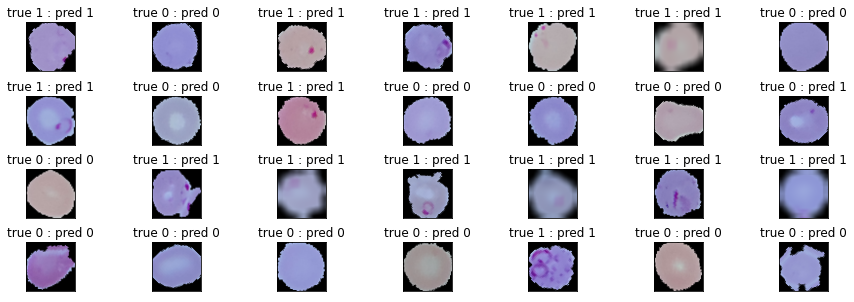

In [34]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(28):
    n += 1 
    r = np.random.randint( 0  , test_x.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(test_x[r[0]])
    plt.title('true {} : pred {}'.format(true[r[0]] , predictions[r[0]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

# Thank You!